In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [3]:
df = pd.read_csv('../data/meteo_18-21.csv')
df["date"] = pd.to_datetime(df["date"])
df.set_index("date",inplace=True)
df.sort_index(inplace=True)
df = df.asfreq('d').fillna(0)
df.drop(columns="Month", inplace=True)
df.head()

,nb,temp,wind,rain
date,,,,
2018-04-10,3062.0,1.23,2.60,0.02
2018-04-11,9599.0,2.60,5.46,0.04
2018-04-12,9611.0,3.22,3.83,0.20
2018-04-13,12738.0,3.97,4.24,0.15
2018-04-14,6854.0,1.32,7.25,1.33


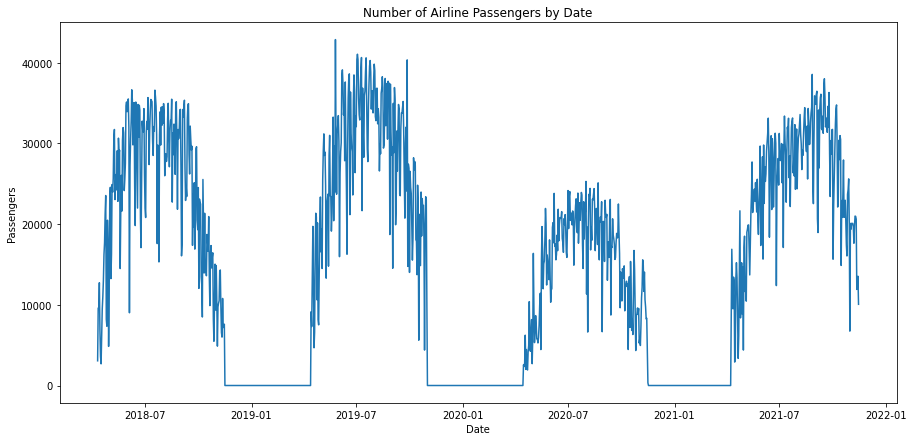

In [4]:
plt.figure(figsize=(15,7))
plt.title("Number of Airline Passengers by Date")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(df["nb"])
plt.show()

In [6]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['nb'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -2.092249
p-value                           0.247643
#Lags Used                       23.000000
Number of Observations Used    1292.000000
Critical Value (1%)              -3.435421
Critical Value (5%)              -2.863780
Critical Value (10%)             -2.567962
dtype: float64


In [8]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['nb'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

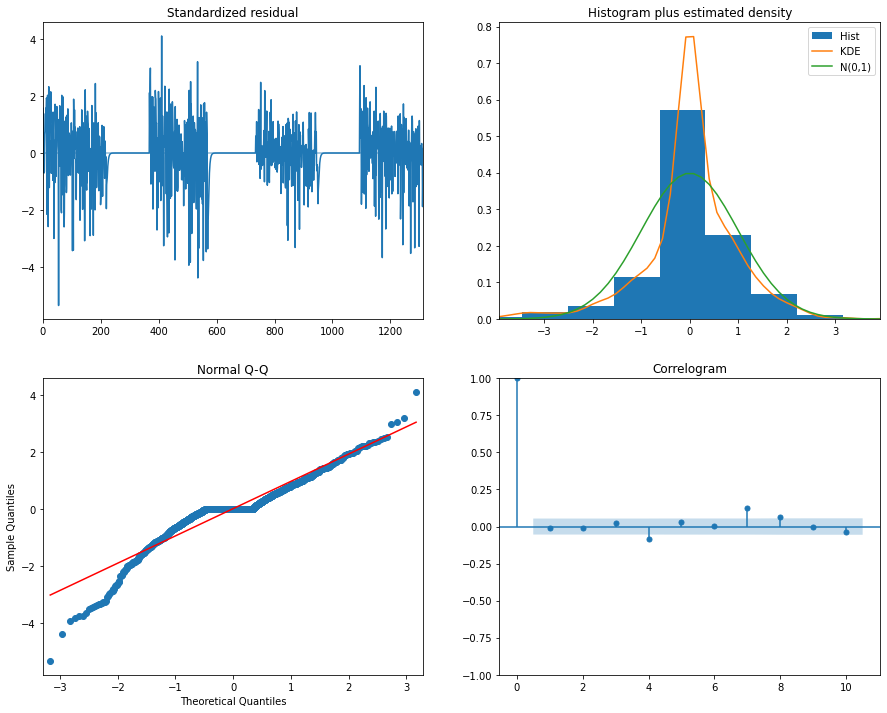

In [9]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()